# RNN-LSTM_XAI(SHAP)

D:\Anaconda3-2024.02-1-Windows\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
D:\Anaconda3-2024.02-1-Windows\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
ExactExplainer explainer: 256it [14:34,  3.44s/it]                                                                     


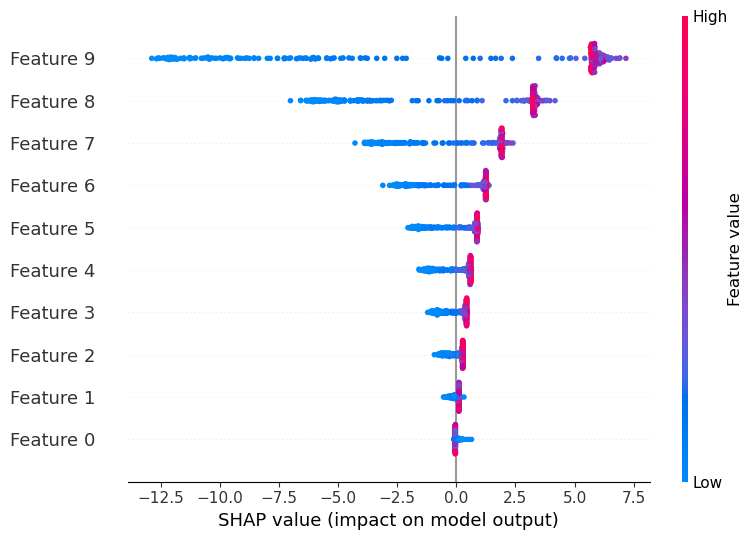

In [1]:
import numpy as np
import tensorflow as tf
import shap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the sunspots dataset
sunspots = np.loadtxt("Sunspots.csv", delimiter=',', skiprows=1, usecols=[2])

# Define window size and batch size
window_size = 10
batch_size = 32

# Function to create windowed dataset
def windowed_dataset(series, window_size, batch_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

# Create train and test sets
split_time = 3000
train_series = sunspots[:split_time]
test_series = sunspots[split_time:]
train_set = windowed_dataset(train_series, window_size, batch_size)
test_set = windowed_dataset(test_series, window_size, batch_size)

# Define the RNN-LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=[None, 1]),
    LSTM(64),
    Dense(1)
])

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Train the model
model.fit(train_set, epochs=10, verbose=0)

# Extract X_test
X_test = np.concatenate([X.numpy() for X, _ in test_set], axis=0)

# Use SHAP to explain the model predictions
explainer = shap.Explainer(model, masker=shap.maskers.Independent(X_test))
shap_values = explainer(X_test)

# Plot the SHAP values
shap.summary_plot(shap_values, X_test)

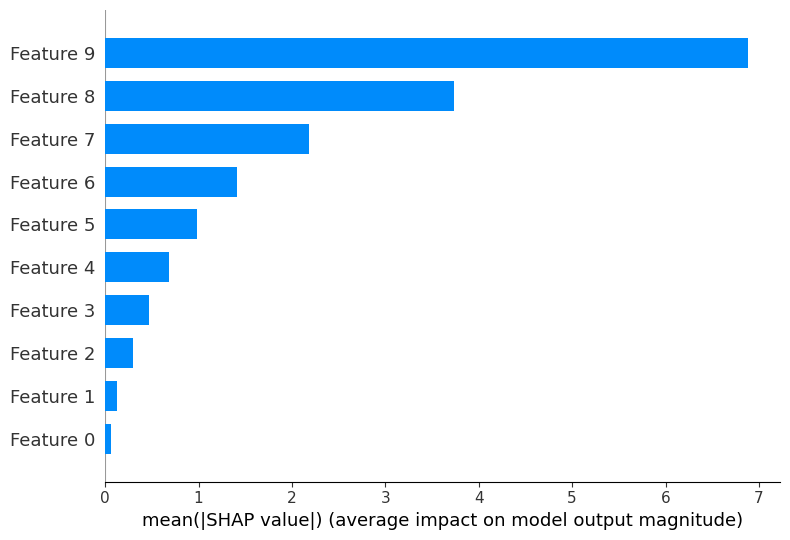

In [2]:
# Plot the SHAP values
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [3]:
shap.initjs(),
shap.plots.force(shap_values[0], X_test[0])

# GRU_XAI(SHAP)

D:\Anaconda3-2024.02-1-Windows\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
D:\Anaconda3-2024.02-1-Windows\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
ExactExplainer explainer: 256it [14:57,  3.55s/it]                                                                     


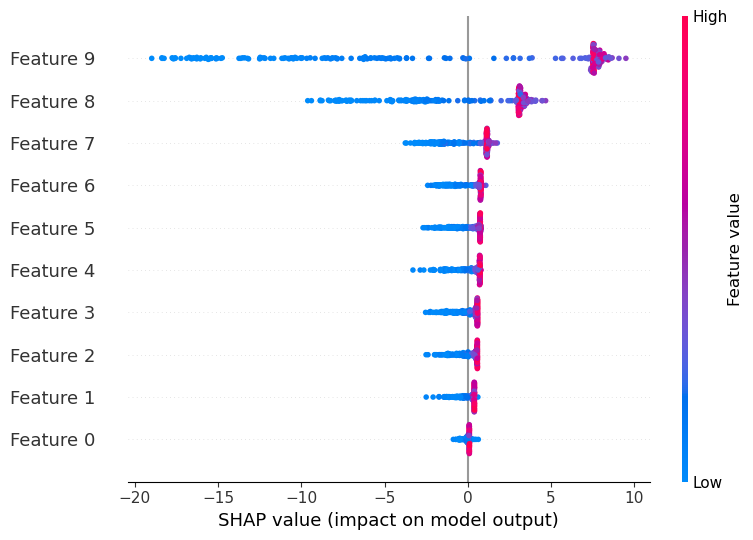

In [4]:
import numpy as np
import tensorflow as tf
import shap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Load the sunspots dataset
sunspots = np.loadtxt("Sunspots.csv", delimiter=',', skiprows=1, usecols=[2])

# Define window size and batch size
window_size = 10
batch_size = 32

# Function to create windowed dataset
def windowed_dataset(series, window_size, batch_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

# Create train and test sets
split_time = 3000
train_series = sunspots[:split_time]
test_series = sunspots[split_time:]
train_set = windowed_dataset(train_series, window_size, batch_size)
test_set = windowed_dataset(test_series, window_size, batch_size)

# Define the GRU model
model = Sequential([
    GRU(64, return_sequences=True, input_shape=[None, 1]),
    GRU(64),
    Dense(1)
])

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Train the model
model.fit(train_set, epochs=10, verbose=0)

# Extract X_test
X_test = np.concatenate([X.numpy() for X, _ in test_set], axis=0)

# ExactExplainer is used for Shap values

# Use SHAP to explain the model predictions
explainer = shap.Explainer(model, masker=shap.maskers.Independent(X_test))
shap_values = explainer(X_test)

# Plot the SHAP values
shap.summary_plot(shap_values, X_test)

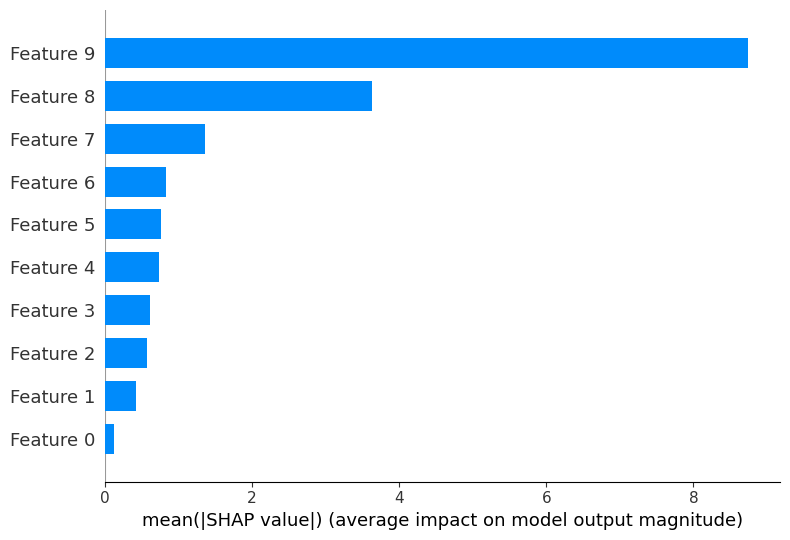

In [5]:
# Plot the SHAP values
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [6]:
shap.initjs(),
shap.plots.force(shap_values[0], X_test[0])

In [7]:
from tensorflow.keras.layers import LSTM, Dense